<a href="https://colab.research.google.com/github/Tower5954/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it:
Predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [52]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

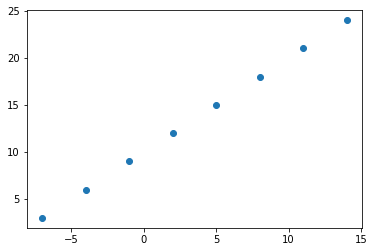

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it

plt.scatter(X, y);

In [54]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inputs and output shape

In [55]:
# Create a demo tensor for a housing price prediction problem 

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [56]:
X[0], y[0]

(-7.0, 3.0)

In [57]:
X[1], y[1]

(-4.0, 6.0)

In [58]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [59]:
X[0].ndim

0

In [60]:
# Turn our Numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [61]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

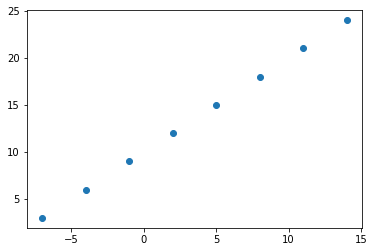

In [62]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (In other words, the function which tell our model how wrong it is.) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting a model find patterns between X & y (features and labels)  

In [117]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model 
model.fit(X, y, epochs=5)


Epoch 1/5
2/2 [==============================] - 0s 5ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/5
2/2 [==============================] - 0s 8ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/5
2/2 [==============================] - 0s 7ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/5
2/2 [==============================] - 0s 6ms/step - loss: 15.5388 - mae: 15.5388


In [118]:
# Try and make a prediction using our model 
model.predict([17.0])

array([[13.3044195]], dtype=float32)

In [119]:
y_pred = model.predict([17.0])
y_pred

array([[13.3044195]], dtype=float32)

In [120]:
y_pred +11

array([[24.30442]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers,
increase thenumber of hidden units (also called neurons)
within each of the hidden layer, change the activation
function of each layer.

2. **Compiling a model** - Here we might change the optimization function or 
perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs**
(leave it training for longer) or on more data (give the model more examples
to learn from)

**Rebuild our model**

In [126]:
# 1. Create the model 

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1153 - mae: 10.1153
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7573 - mae: 10.7573
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9824 - mae: 11.9824
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7467 - mae: 10.7467
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4779 - mae: 10.4779
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7897 - mae: 11.7897
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2810 - mae: 9.2810
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.9451 - mae: 11.9451
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7311 - mae: 12.7311
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9811 - mae: 9.9811
Epoch 11/100
2/2 [==============================] - 0s 10ms/s

Remind ourselves of the data.

In [122]:
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

See if our model's prediction has improved.



In [127]:
model.predict([17.0])

array([[16.783604]], dtype=float32)

See if we can improve our model.




In [128]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model

model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4031 - mae: 40.4031
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 14.6609 - mae: 14.6609
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 19.6301 - mae: 19.6301
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8276 - mae: 12.8276
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6480 - mae: 12.6480
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5584 - mae: 14.5584
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3702 - mae: 10.3702
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0766 - mae: 15.0766
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.2866 - mae: 15.2866
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.2826 - mae: 8.2826
Epoch 11/100
2/2 [==============================] - 0s 6ms/st

In [129]:
model.predict([17.0])

array([[14.16788]], dtype=float32)

**Common ways to improve a deep model:**

* Adding layers # We added 1 to the previous model 
* Increase the number of hidden units # our layers above are 100
* Change the activation functions # activation= relu 
* Change the optimizer function # SGD 

 #-----Could be the most important one -------#
* **Change the learning rate # (lr=...) or (learning_rate=...)**

* Fitting on more data
* Fitting for longer

Adjusting:

In [130]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model

model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 24.5722 - mae: 24.5722
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.7122 - mae: 11.7122
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 10.4141 - mae: 10.4141
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2770 - mae: 13.2770
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9531 - mae: 9.9531
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1835 - mae: 9.1835
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1361 - mae: 9.1361
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9902 - mae: 9.9902
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6776 - mae: 8.6776
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.0772 - mae: 8.0772
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - los

In [105]:
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [131]:
model.predict([17.0])

array([[26.80497]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:   
```
Build a model -> fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

When it comes to evaluation...

> " Visualise, visualise, visualise"

It's a good idea to visualise:
* The data - what data are we working with? What does it look like?
* The model itself - what does the model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up 
against the ground truth (the original labels)?

In [75]:
# Make a bigger dataset 

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [76]:
# Make labels for the dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

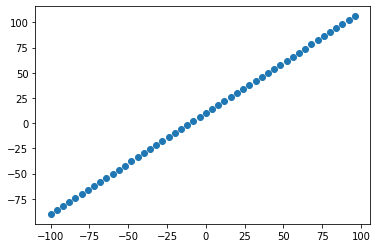

In [77]:
# Visualise the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets...

* **Training set**   - the model learns from this data, which is typically 70-80 % of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% 
of the data.
* **Test set** - the model gets evaluated on this data to test what is has learned,
this set is typically 10-15% of the total data availability.

In [96]:
# Check the length of samples we have
len(X)

50

In [97]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [98]:
len(y_train), len(y_test)

(40, 10)

### Visualise the data

Now that we have our data into training and test sets. Let us visualise it.

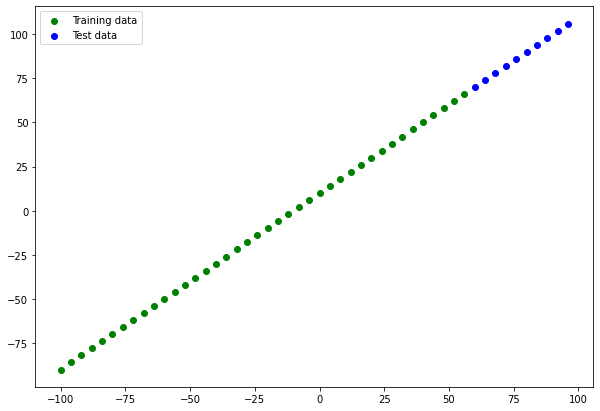

In [99]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c='g', label="Training data")

plt.scatter(X_test, y_test, c='b', label='Test data')

plt.legend();

In [82]:
# How to build a neural network for our data

# 1. Create a m ode

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model

# model.fit(X_train, y_train, epochs=100)



### Visualising the model 

The following code will error out:

In [83]:
#-------------error out---------------#

# model.summary()

In [111]:
# Create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [85]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of params in the model.
* Trainable params - these are the parameters (patterns)
the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

📖 **Resource:** 📖

For a more in-depth overview of the trainable parameters within a layer, check out MIT's Introduction to deep-learning video:

http://introtodeeplearning.com/

In [112]:
# Fitting our model to the training data

model.fit(X_train, y_train, epochs=100, verbose=0)

In [87]:
# Get a summary of the model 

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [88]:
from tensorflow.keras.utils import plot_model



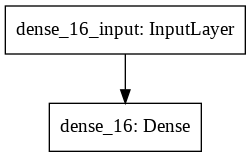

In [89]:
plot_model(model=model)

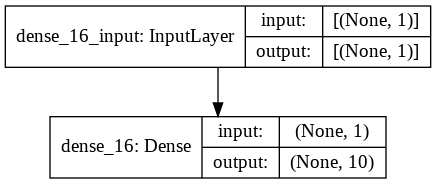

In [90]:
plot_model(model=model, show_shapes=True)

In [100]:
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [92]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


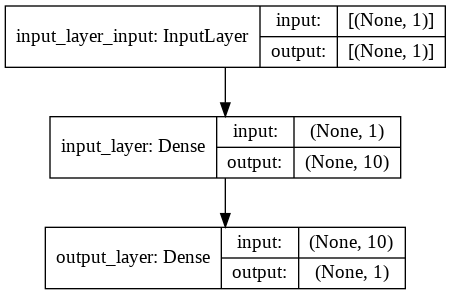

In [93]:
plot_model(model=model, show_shapes=True)

### Visualising our model's predictions

To visualise predictions, it's a good idea to plot them against the ground truth labels.

Often we will see this in the form `y_test` or `y_true` vs. `y_pred`(ground truth versus your model's predictions).

In [135]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 69.4298  ],
       [ 73.394905],
       [ 77.36    ],
       [ 81.3251  ],
       [ 85.29021 ],
       [ 89.2553  ],
       [ 93.2204  ],
       [ 97.1855  ],
       [101.150604],
       [105.1157  ]], dtype=float32)

In [136]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you are going to reuse some kind of functunality in the future, it is a good idea to turn it into a function.🔑 

In [137]:
# Create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green 
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')

  # Show the legend
  plt.legend();


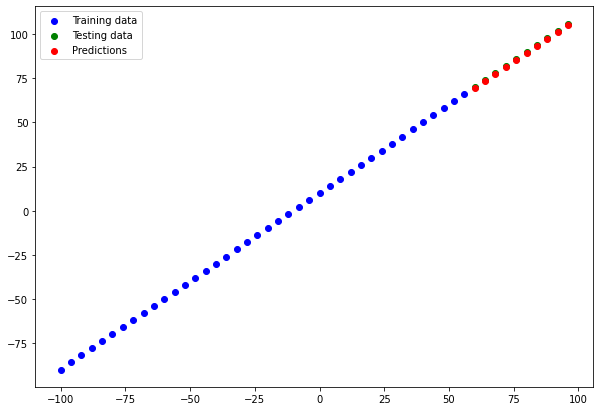

In [138]:
plot_predictions()

In [139]:
model.predict([17.0])

array([[26.80497]], dtype=float32)